## **AutoEncoders**

These are NN architectures that do not use a response variable for training (unsupervised). The goal is to reconstruct the original variables.

**Notation**

* $x$ is the vector of original predictors
* $\tilde{x}$ is the vector of reconstructed predictors

Input layer will contain $x$, and the output layer will contain $\tilde{x}$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

## load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
## you have 1 channel (grayscale) - 28 pixels x 28 pixels
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  96, 244, 251, 253,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 127, 251, 251, 253,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 236, 251, 211,  31,   8,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  60, 228, 251, 251,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 155, 253, 253, 189,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  20, 253, 251, 235,  66,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         32, 205, 253, 251, 126,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        104, 251, 253, 184,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  80,
        240, 251, 193,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 253,
        253, 253, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 251,
        251, 251,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 221, 251,
        251, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 234, 251, 251,
        196,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 251, 251,
         89,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 255, 253, 253,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  48, 228, 253, 247, 140,
          8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 251, 253, 220,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 251, 253, 220,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

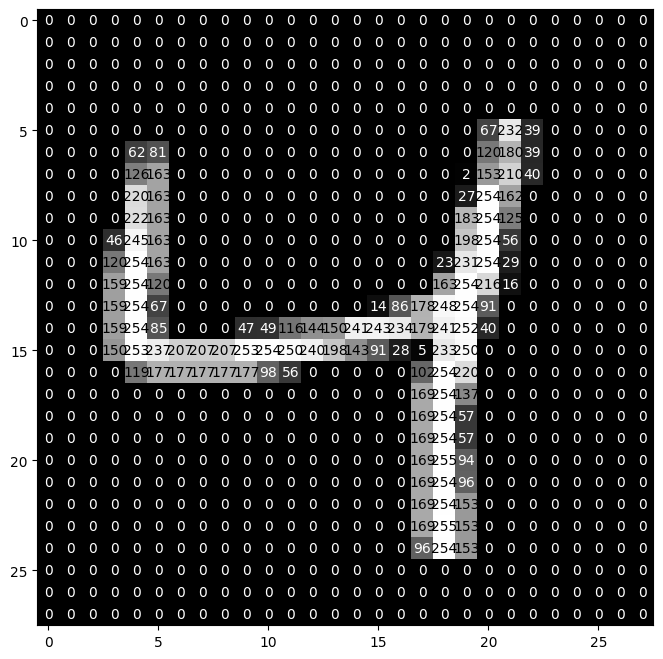

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
visualize_input(X_train[2].reshape(28,28), ax)

In [ ]:
## NNs have exploding gradients with large values
## standardize 0 - 1 is recommended or normalized (-3 to 3)
## if data is NOT an image use from sklearn.decomposition  import standardscaler
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

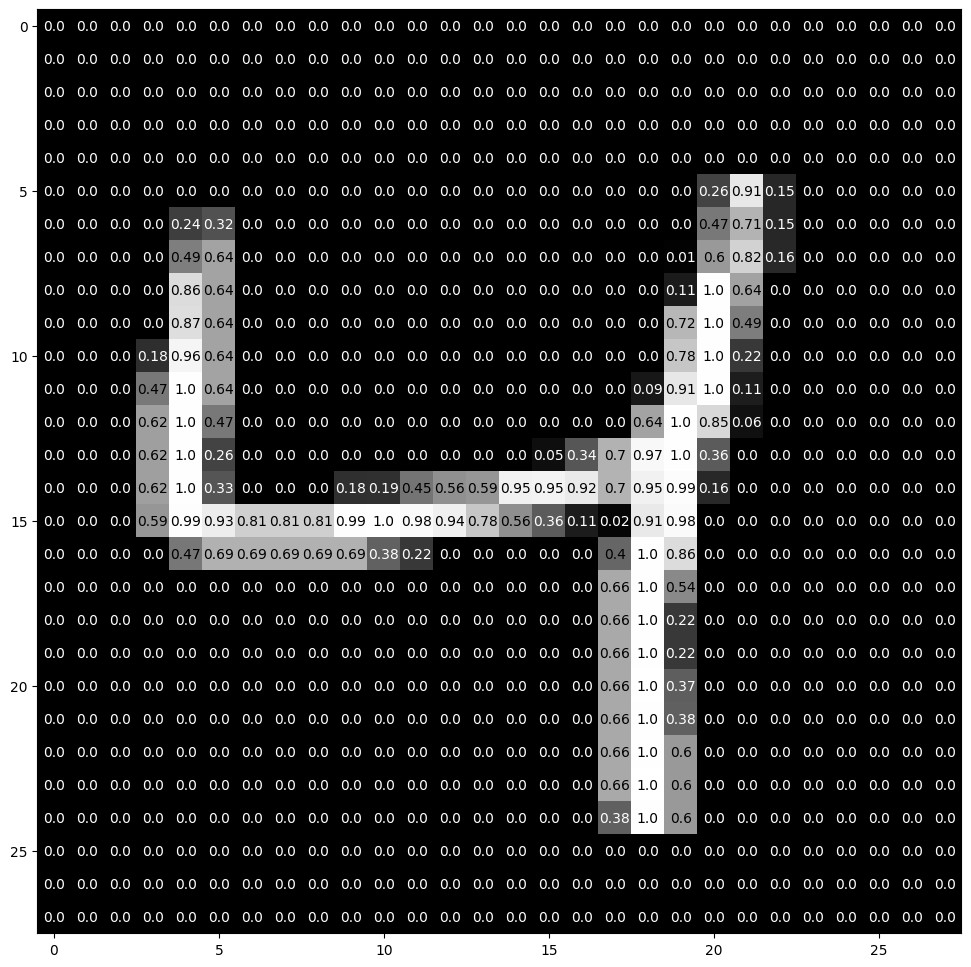

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[2].reshape(28,28), ax)

In [ ]:
## training has 60000
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
## Flatten Images
## Instead of 28*28, we want every image to have 784 predictors
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

## **Autoencoder Implementation using Tensorflow**

* loss: either the MSE or binary_crossentropy (assumes 0-1 scale)
* fit: `.fit(X_train, X_train)`
* metrics: use numeric metrics "mse", "rmse", "r2score"

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

## network architecture - 784 - 500 - 250 - 50  -----10------ 50 - 250 - 500 - 784 (ReLu)
AE = Sequential()
## Encoder
AE.add(Input(shape=(784,)))
AE.add(Dense(units=500, activation='relu'))
AE.add(Dense(units=250, activation='relu'))
AE.add(Dense(units=50, activation='relu'))
## Botteneck
AE.add(Dense(units=10, activation='relu'))
## Decoder
AE.add(Dense(units=50, activation='relu'))
AE.add(Dense(units=250, activation='relu'))
AE.add(Dense(units=500, activation='relu'))
AE.add(Dense(units=784, activation='sigmoid'))  ## Output sigmoid b/c scaled to 0-1

In [ ]:
## Summary
AE.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │          12,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 250)                 │          12,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 500)                 │         125,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 784)                 │         392,784 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062,394 (4.05 MB)

 Trainable params: 1,062,394 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Compile
import tensorflow as tf
AE.compile(optimizer= "adam", loss='mse')

In [ ]:
## fit
## early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = AE.fit(X_train, X_train, epochs=50, batch_size = 500, validation_data = (X_test, X_test), callbacks=[early_stopping])

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0246 - val_loss: 0.0236
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0235 - val_loss: 0.0231
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - val_loss: 0.0227
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - val_loss: 0.0224
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0223 - val_loss: 0.0221
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - val_loss: 0.0218
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0216 - val_loss: 0.0215
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0213 - val_loss: 0.0213
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - val_loss: 0.0210
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - val_loss: 0.0209
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205 - val_loss: 0.0207
Epoch 12/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

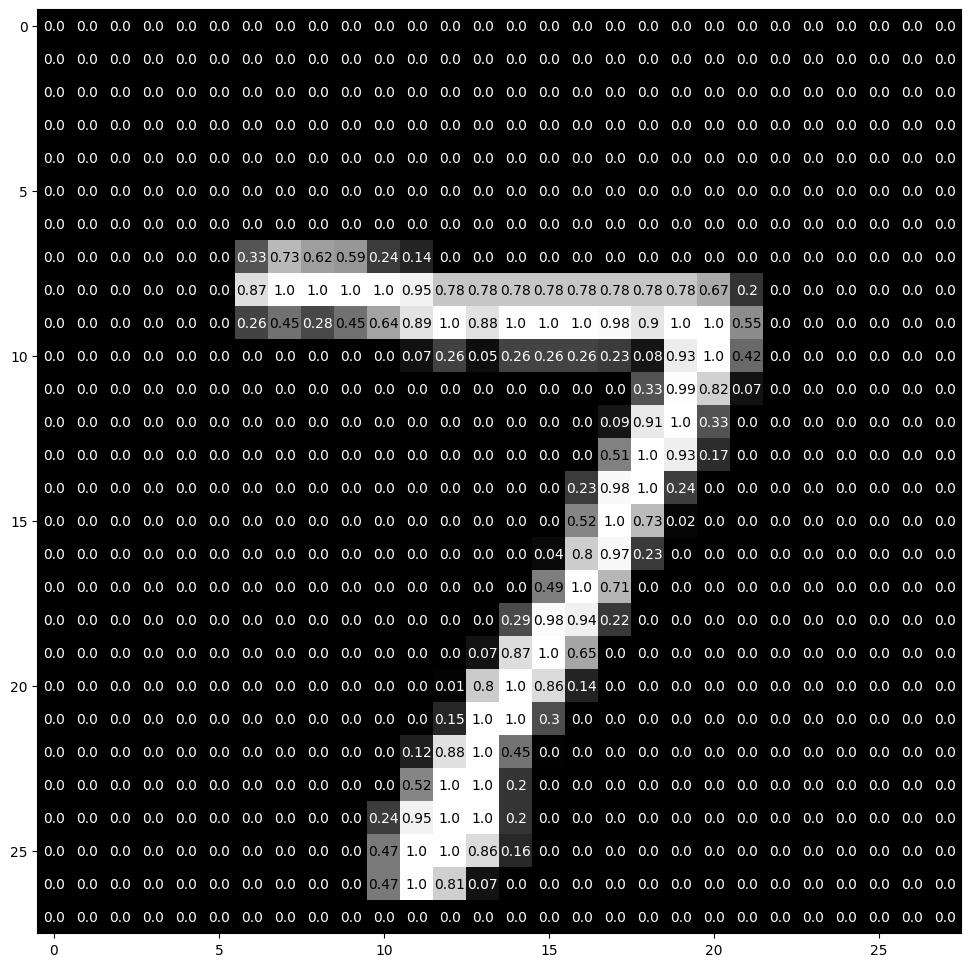

In [ ]:
## Original Image
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_test[0].reshape(28,28), ax)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


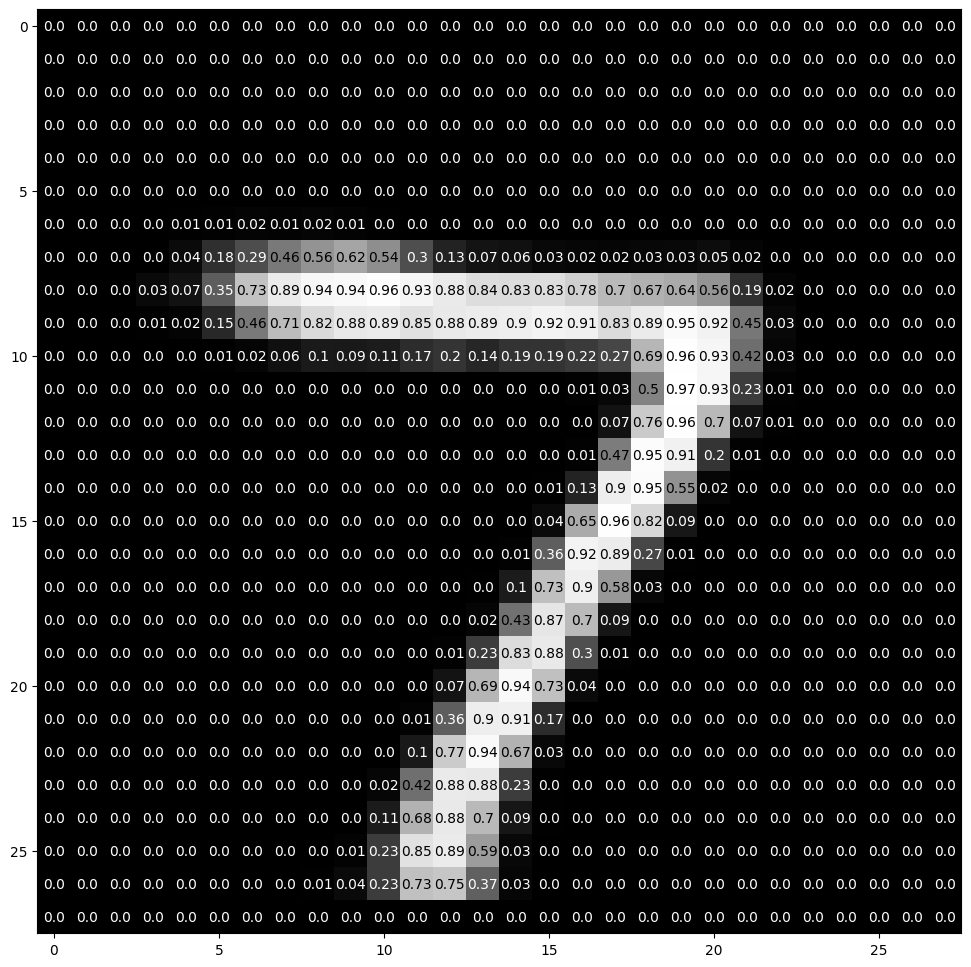

In [ ]:
## Reconstructed Image
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(AE.predict(X_test)[0].reshape(28,28), ax)

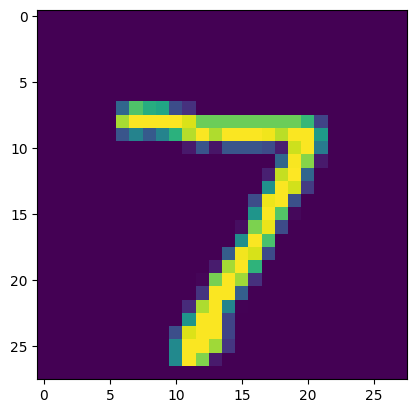

In [ ]:
plt.imshow(X_test[0].reshape(28,28))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


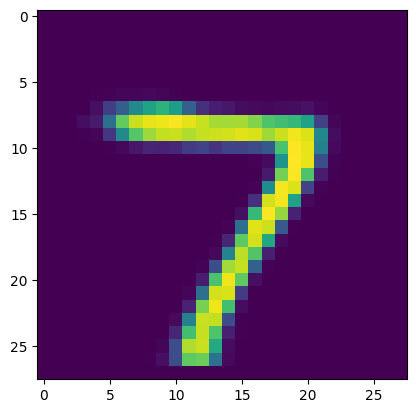

In [ ]:
plt.imshow(AE.predict(X_test)[0].reshape(28,28))

In [ ]:
## Reconstructed Images (Data)
## get them using the .predict function
reconstructed_test_images = AE.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
## Reconstruction error
## x - \tilde(x)
## x is 784 variables and \tilde(x) is 784 variables
## avg per obs(x - \tilde(x))

reconstruction_error = np.mean(np.power(X_test - reconstructed_test_images, 2), axis=1) ## every obs has 1 reconstruction error

In [ ]:
reconstruction_error

array([0.00436081, 0.02019677, 0.00194124, ..., 0.00683287, 0.01908553,
       0.01848526], dtype=float32)

In [ ]:
## sort the reconstruction error (descending)
## top errors are obs where the AE had issues reconstruction the image
## these can be thought of as anomalies
X_train_reconstruction = pd.DataFrame(X_train, columns = [f'pixel{i}' for i in range(784)])

In [ ]:
reconstruction_error_train = np.mean(np.power(X_train - AE.predict(X_train), 2), axis=1)
X_train_reconstruction['Reconstruction Error'] = reconstruction_error_train

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
## sort descending on Reconstruction Error
X_train_reconstruction = X_train_reconstruction.sort_values('Reconstruction Error', ascending=False)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Reconstruction Error
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035304
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014975
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022038
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001814
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014741
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016294
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019196
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013051
